In [42]:
import sys
import os
from astropy.io import fits
from astropy import units
import glob
import pandas as pd
import numpy as np

%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# All the FITS possibilities!!

Astropy's package files is really good for reading and manipulating FITS.

The basic FITS file consists of a list of Header Data Units (HDU).  These are called extenstions and they each contain a header and data array.  Not all FITS files will have multiple extensions, but since SAMI's CCD is read out through 4 amplifiers, there are 4 extentions for each.  
The primary HDU contains the information that is common between the headers of each subsequent extention.  We can even make keywords that are useful for referencing back to information on the server.  For instance, if each SAMOS observation night had an assigned ID like `OBSYYY-MM-DD`, we could have a keyword called `OBSID` as a default for all the fits files.  Then we could use this to sort observations in the database.

All FITS files contain a set of required keywords that must appear in the following order:
<br><br>

<dl>
    <dt> SIMPLE </dt> 
    <dd>(logical)"T" testifies that this file conforms to FITS file standards.  If this value is `F` then you don't have a FITS file. </dd>
    <dt> BITPIX </dt> 
    <dd> (integer) describes how an array value is represented and can only be one of the following
        <ul>
        <li>$\textbf{8}$ - ASCII characters or 8-bit unsigned integers</li>
        <li>$\textbf{16}$ - 16-bit two's complement signed integers</li> 
        <li>$\textbf{32}$ - 32-bit two's complement signed integers</li>
        <li>$\textbf{-32}$ IEEE 32-bit floating point values</li>
        <li>$\textbf{-64}$ IEEE 64-bit floating point values </li>
        </ul>
    </dd>
    <dt>NAXIS</dt> <dd>(integer) number of axes for the associated data array. Is usually 2 for spatial and dispersion axes, but can be zero for a primary HDU with no data.</dd>
    <dt>NAXIS$n$, where $n=1,2,...,$NAXIS</dt> <dd>(integer) number of elements along the axis.  If NAXIS=0, this keyword is not present.</dd>
    <dt>END</dt> <dd> No value but this has to be the last line of the header.  All of the optional keywords come before this and after the required keywords.</dd>
</dl>


In [10]:


HDUlist = fits.open('./psa_171022_082742_ori.fits.fz') 

# check out the main information for HDUlist 

HDUlist.info()

Filename: ./psa_171022_082742_ori.fits.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     150   ()      
  1  im1           1 CompImageHDU    144   (1083, 1028)   int16   
  2  im2           1 CompImageHDU    144   (1083, 1028)   int16   
  3  im3           1 CompImageHDU    144   (1083, 1028)   int16   
  4  im4           1 CompImageHDU    144   (1083, 1028)   int16   


In [296]:
# Primary header information

Prmy = HDUlist[0].header

# here are the values for the required keywords in the primary HDU
Prmy[:60]

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
COMMENT MODIFIED:DATE-OBS,INSTRUME,OBSERVAT,OBSID,OBSTYPE,PROPID,SIMPLE,TELESCOP
COMMENT ,TIME-OBS                                                               
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
NEXTEND =                   

In [41]:
# retrive the size of the dispersion axis NAXIS1 for the first extension

hdu1 = HDUlist[1]
# here's what the full header of the first extension looks like

hdu1.header 

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1083 / length of data axis 1                          
NAXIS2  =                 1028 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
NEXTEND =                    4 / Number of extensions                           
IMAGEID =                    1 / Image identification                           
EXTNAME = 'im1     '           / Extension name                                 
FILENAME= '/home2/images/201

Text(0, 0.5, 'NAXIS2 (pixel)')

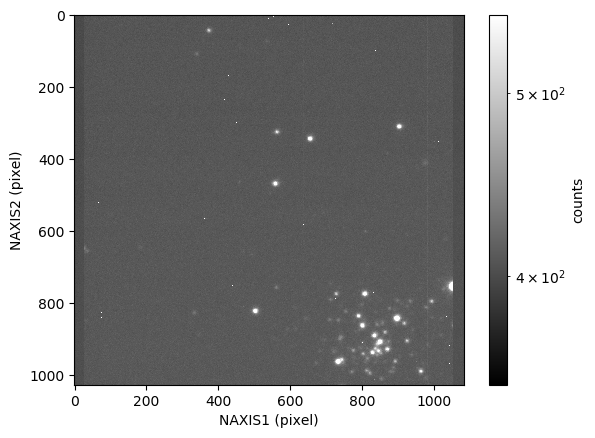

In [263]:
# and here's what the actual image data looks like!

plt.imshow(hdu1.data,cmap='gray',norm=LogNorm(350,550))

cbar = plt.colorbar()
cbar.ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

cbar.ax.set_ylabel('counts')
plt.xlabel('NAXIS1 (pixel)')
plt.ylabel('NAXIS2 (pixel)')

# Header Keywords for DMD Patterns


Since there will probably be some coordinate transformations involved, particularly for going from DMD mirror to pixel location, some of these keywords might be helpful. 

In [294]:
kw_list = list(hdu1.header.keys())
wanted_keywords = ['PIXSIZE1', 'PIXSIZE2', 'PIXSCAL1', 'PIXSCAL2', 'RAPANGL', 'DECPANGL', 'ROTATOR', 'ROTOFFS',]
wkw_inds = [i for i in range(len(kw_list)) if kw_list[i] in wanted_keywords]


#print the list of all keywords
print(kw_list)

hdu1.header[wkw_inds[0]:wkw_inds[-1]] #values for selected keywords


['XTENSION', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'PCOUNT', 'GCOUNT', 'NEXTEND', 'IMAGEID', 'EXTNAME', 'FILENAME', 'RADECSYS', 'TIMESYS', 'MJDHDR', 'OBSERVAT', 'TELESCOP', 'TELRADEC', 'TELEQUIN', 'TELRA', 'TELDEC', 'HA', 'ZD', 'AIRMASS', 'TELFOCUS', 'ADC', 'DETECTOR', 'NCCDS', 'NAMPS', 'PIXSIZE1', 'PIXSIZE2', 'PIXSCAL1', 'PIXSCAL2', 'RAPANGL', 'DECPANGL', 'ROTATOR', 'ROTOFFS', 'FILTERS', 'FILTER1', 'FILTER2', 'FILPOS', 'SHUTSTAT', 'TV1FOC', 'ENVTEM', 'DEWAR', 'DEWTEM', 'DEWTEM2', 'DEWTEM3', 'CCDTEM', 'CCDTEM2', 'WEATDATE', 'WINDSPD', 'WINDDIR', 'AMBTEMP', 'HUMIDITY', 'PRESSURE', 'DIMMSEE', 'CONSWV', 'OBSERVER', 'PROPOSER', 'PROPOSAL', 'PROPID', 'IMAGESWV', 'KWDICT', 'OTFDIR', 'XTALKFIL', 'OBSID', 'OBJECT', 'OBSTYPE', 'EXPTIME', 'DARKTIME', 'PREFLASH', 'RA', 'DEC', 'RADECEQ', 'DATE-OBS', 'TIME-OBS', 'MJD-OBS', 'LSTHDR', 'CCDNAME', 'AMPNAME', 'GAIN', 'RDNOISE', 'SATURATE', 'CONTROLR', 'CONHWV', 'AMPINTEG', 'READTIME', 'BPM', 'CCDSUM', 'DATASEC', 'BIASSEC', 'CCDSEC', 'AMPSEC', 'TRIMSEC'

PIXSIZE1=                  15. / Unbinned Pixel size for axis 1 (microns)       
PIXSIZE2=                  15. / Unbinned Pixel size for axis 2 (microns)       
PIXSCAL1=                0.045 / Unbinned Pixel scale for axis 1 (arcsec/pixel) 
PIXSCAL2=                0.045 / Unbinned Pixel scale for axis 2 (arcsec/pixel) 
RAPANGL =                 270. / Position angle of RA axis (deg)                
DECPANGL=                   0. / Position angle of DEC axis (deg)               
ROTATOR =                330.3 / Position angle of rotator                      

In [ ]:
#you can change the value of a keyword, make a new keyword, and add to history/comments for a record.




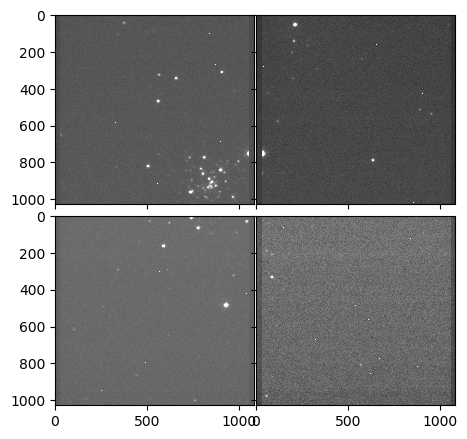

In [278]:
# Let's put all the extensions together

hdu2 = HDUlist[2]
hdu3 = HDUlist[3]
hdu4 = HDUlist[4]

fig = plt.figure(figsize=(10,10))
gs = matplotlib.gridspec.GridSpec(2,2,figure=fig)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

fig.subplots_adjust(bottom=0.1, top=0.5, left=0.1, right=0.5,
                    wspace=0.01, hspace=0.01)

norm1 = LogNorm(350,550)
norm2 = LogNorm(450,600)



im1 = ax1.imshow(hdu1.data,cmap='gray',norm=norm1)
im2 = ax2.imshow(hdu2.data,cmap='gray',norm=norm2)
im3 = ax3.imshow(hdu3.data,cmap='gray',norm=norm1)
im4 = ax4.imshow(hdu4.data,cmap='gray',norm=LogNorm(400,466))

#cbar = fig.colorbar(ax=fig.axes,mappable=im1)


ax1.tick_params(labelbottom=False)
ax2.tick_params(labelbottom=False,labelleft=False)
ax4.tick_params(labelleft=False)

(400, 600)

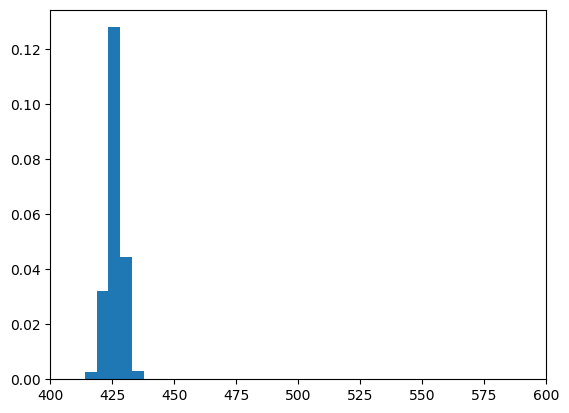

In [244]:
np.median(hdu4.data)

426.0

In [198]:
np.exp(6.3)

544.571910125929